# Task 3: Exploratory Data Analysis

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Taking a look of data

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
dup = df[df.duplicated()]
dup

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [6]:
df.drop_duplicates(subset=None, keep='first', inplace=True)
df.duplicated().sum()

0

In [7]:
df = df.drop(['Postal Code'],axis = 1) 

## Explonatory Data Analysis (EDA)

Text(0, 0.5, 'Profit')

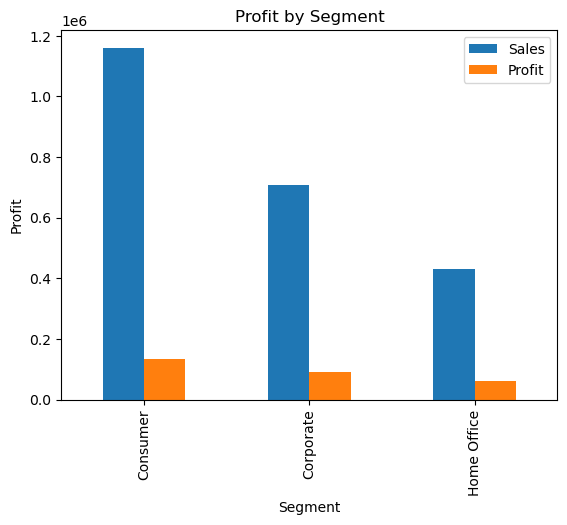

In [8]:
# Calculate total sales and profit by Segment
sub_cat_profit = df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
sub_cat_profit.plot(kind='bar')
plt.title('Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Profit')

It is observed that Sales & Profit are High in segment Consumer and very low in Home Office.

Text(0, 0.5, 'Sale & Profit')

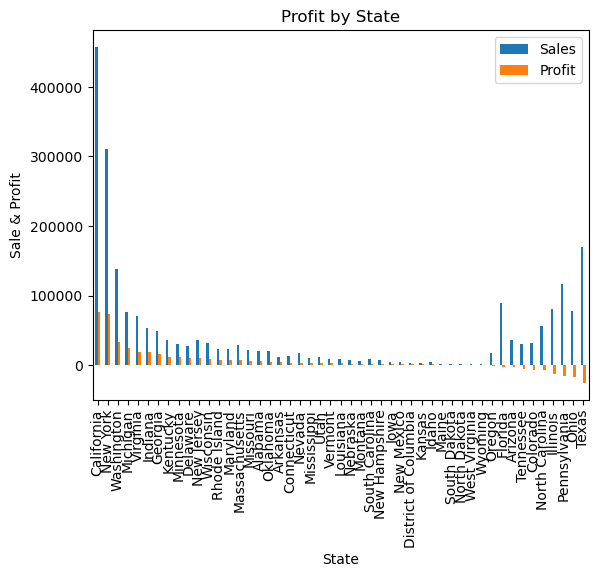

In [9]:
# Calculate total sales and profit by state
sub_cat_profit = df.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
sub_cat_profit.plot(kind='bar')
plt.title('Profit by State')
plt.xlabel('State')
plt.ylabel('Sale & Profit')

It is observed that in California & New york both Sales & PRofit are very High, but in some States lik Texas, Ohio & Pennsylvania the Sales are quit better but there is a great loss.

Text(0, 0.5, 'Sale & Profit')

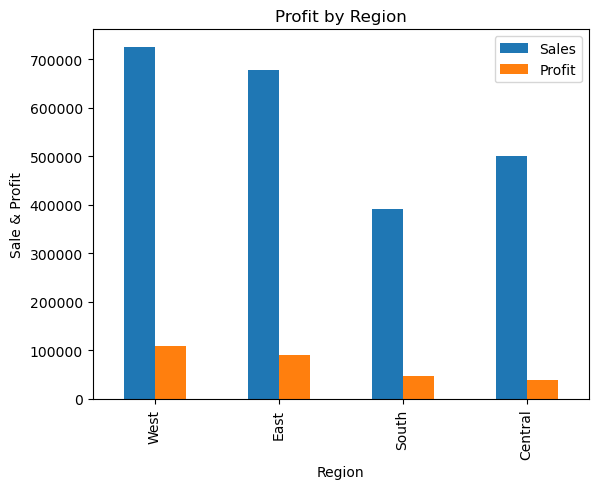

In [10]:
# Calculate total sales and profit by Region
sub_cat_profit = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
sub_cat_profit.plot(kind='bar')
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Sale & Profit')

It is observed that In west Sales & Profit are very high but in Centra these are comparitively low.

Text(0, 0.5, 'Sale & Profit')

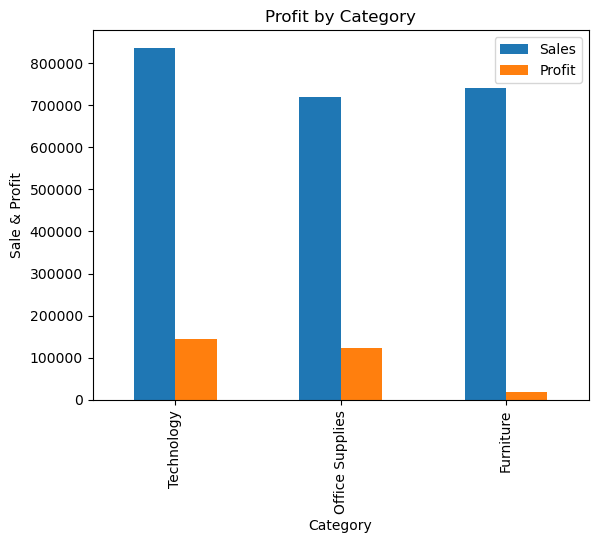

In [11]:
# Calculate total sales & profit by category
cat_profit = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
cat_profit.plot(kind='bar')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Sale & Profit')

It is observed that we have great Slaes & Profit in Technoly Category but comparitively low in Furniture.

Text(0, 0.5, 'Sale & Profit')

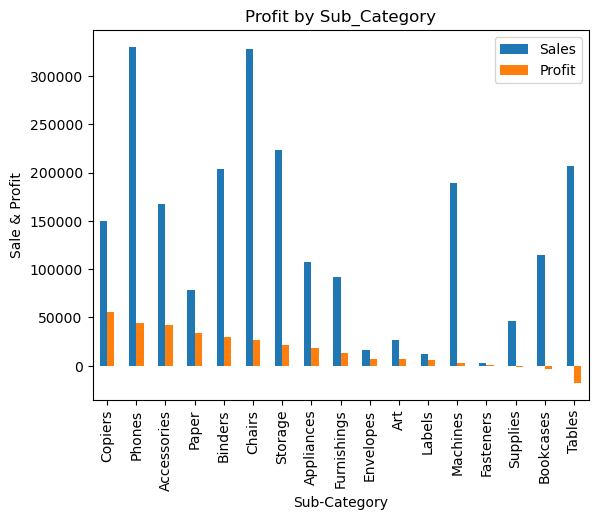

In [12]:
# Calculate total sales & profit by Sub-Category
sub_cat_profit = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
sub_cat_profit.plot(kind='bar')
plt.title('Profit by Sub_Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sale & Profit')

It seems that we have great Slaes & Profit in Phone or Binders.

Text(0, 0.5, 'Sale & Profit')

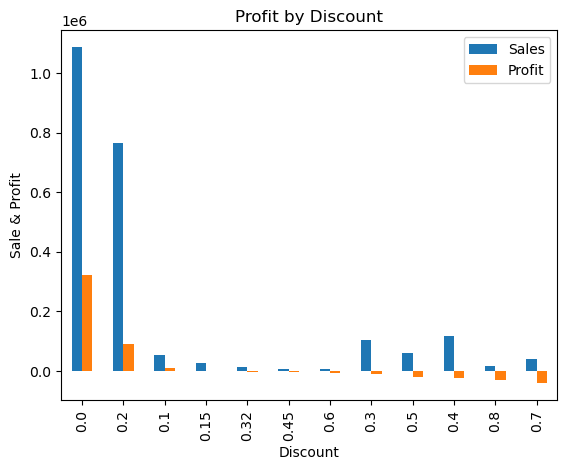

In [13]:
# Calculate total sales & profit by Sub-Category
sub_cat_profit = df.groupby('Discount')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
sub_cat_profit.plot(kind='bar')
plt.title('Profit by Discount')
plt.xlabel('Discount')
plt.ylabel('Sale & Profit')

There is not any specific impact of Discount on Sales and Profit.

Task 3 completed
## Muhammad Azam